In [335]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from numba import njit
import multiprocessing

plt.rcParams['axes.linewidth'] = 3.0

In [336]:
def plot_r_mag(pos_list,t_array,plt_name):
    try:
        pos_array = np.array(pos_list)
        if pos_array.ndim != 2 or pos_array.shape[1] != 2:
            print(f"Error: Position list has an unexpected shape: {pos_array.shape}")
            print("Expected (N, 2) where N is the number of steps.")
            return
    except Exception as e:
        print(f"Error converting position list to NumPy array: {e}")
        return

    r_mag_array = np.linalg.norm(pos_array, axis=1)
    fig, ax_main = plt.subplots(figsize=(10, 8))
    ax_main.semilogy(t_array, r_mag_array, label='Orbit', zorder=0,lw=3,color='purple')
    ax_main.set_title('Separation vs. Time',fontsize=23,pad=15)
    ax_main.set_xlabel('Time (Units of Elliptical Orbital Period)',fontsize=20)
    ax_main.set_ylabel('Separation r (Units: 100pc)',fontsize=20)
    ax_main.tick_params(axis='both', which='major', labelsize=15)
    ax_main.grid(True)
    #ax_main.legend(loc='upper right',fontsize=20)
    plt.savefig(f'./hw4_p2_r_magnitude_{plt_name}',bbox_inches="tight")

def plot_orbit_full(pos_list, plt_name, perihelion_zoom_size=1e-7,aphelion_zoom_size=1e-3):
    try:
        pos_array = np.array(pos_list)
        if pos_array.ndim != 2 or pos_array.shape[1] != 2:
            print(f"Error: Position list has an unexpected shape: {pos_array.shape}")
            print("Expected (N, 2) where N is the number of steps.")
            return
    except Exception as e:
        print(f"Error converting position list to NumPy array: {e}")
        return

    x_coords = pos_array[:, 0]
    y_coords = pos_array[:, 1]
    start_pos = pos_array[0] # This is our aphelion center

    fig, ax_main = plt.subplots(figsize=(10, 8))
    ax_main.plot(0, 0, 'ko', markersize=10, label='Center of Mass')
    ax_main.plot(x_coords, y_coords, label='Orbit Path', zorder=0,lw=2)
    ax_main.plot(x_coords[0], y_coords[0], 'go', label='Start (Aphelion)', markersize=8, zorder=1)
    ax_main.plot(x_coords[-1], y_coords[-1], 'rs', label='End', markersize=8, zorder=1)
    ax_main.set_title('Simulated 2D Orbit (Full View)',fontsize=23,pad=15)
    ax_main.set_xlabel('X Position (Units: 100pc)',fontsize=20)
    ax_main.set_ylabel('Y Position (Units: 100pc)',fontsize=20)
    ax_main.tick_params(axis='both', which='major', labelsize=15)
    ax_main.grid(True)
    ax_main.axis('equal')
    ax_main.legend(loc='upper right',fontsize=20)

    ax_inset_peri = inset_axes(ax_main, width="25%", height="25%", loc='lower left', borderpad=5)
    ax_inset_peri.plot(0, 0, 'ko', markersize=10, label='Center of Mass',lw=2)
    ax_inset_peri.plot(x_coords, y_coords, label='Orbit Path')
    limit_peri = perihelion_zoom_size * 2 
    ax_inset_peri.set_xlim(-limit_peri, limit_peri)
    ax_inset_peri.set_ylim(-limit_peri, limit_peri)
    ax_inset_peri.xaxis.set_major_locator(MaxNLocator(nbins=3, prune='both'))
    ax_inset_peri.yaxis.set_major_locator(MaxNLocator(nbins=3, prune='both'))
    ax_inset_peri.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax_inset_peri.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax_inset_peri.tick_params(axis='both', which='major', labelsize=8)
    ax_inset_peri.grid(True)
    ax_main.indicate_inset_zoom(ax_inset_peri, edgecolor="black")


    ax_inset_ap = inset_axes(ax_main, width="25%", height="25%", loc='lower right', borderpad=5) 
    ax_inset_ap.plot(x_coords, y_coords, label='Orbit Path',lw=2)
    ax_inset_ap.plot(start_pos[0], start_pos[1], 'go', markersize=8) # Mark the start point
    limit_ap = aphelion_zoom_size
    ax_inset_ap.set_xlim(start_pos[0] - limit_ap, start_pos[0] + limit_ap)
    ax_inset_ap.set_ylim(start_pos[1] - limit_ap, start_pos[1] + limit_ap)
    ax_inset_ap.xaxis.set_major_locator(MaxNLocator(nbins=3, prune='both'))
    ax_inset_ap.yaxis.set_major_locator(MaxNLocator(nbins=3, prune='both'))
    ax_inset_ap.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax_inset_ap.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax_inset_ap.tick_params(axis='x', which='major', labelsize=8, labelrotation=45)
    ax_inset_ap.tick_params(axis='y', which='major', labelsize=8)
    ax_inset_ap.grid(True)
    ax_main.indicate_inset_zoom(ax_inset_ap, edgecolor="black")
    plt.savefig(f'./hw4_p2_full_orbit_{plt_name}',bbox_inches="tight")
    plt.show()

def plot_orbit_scaled(pos_list,plt_name):
    try:
        pos_array = np.array(pos_list)
        if pos_array.ndim != 2 or pos_array.shape[1] != 2:
            print(f"Error: Position list has an unexpected shape: {pos_array.shape}")
            print("Expected (N, 2) where N is the number of steps.")
            return
    except Exception as e:
        print(f"Error converting position list to NumPy array: {e}")
        return

    x_coords = pos_array[:, 0]
    y_coords = pos_array[:, 1]

    fig, ax_main = plt.subplots(figsize=(10, 8))
    ax_main.plot(0, 0, 'ko', markersize=10, label='Center of Mass')
    ax_main.plot(x_coords, y_coords, label='Orbit Path', zorder=0)
    ax_main.plot(x_coords[0], y_coords[0], 'go', label='Start (Aphelion)', markersize=8, zorder=1)
    ax_main.plot(x_coords[-1], y_coords[-1], 'rs', label='End', markersize=8, zorder=1)
    ax_main.set_title('Simulated 2D Orbit (Scaled Y-axis)',fontsize=23,pad=15)
    ax_main.set_xlabel('X Position (Units: 100pc)',fontsize=20)
    ax_main.set_ylabel('Y Position (Units: 100pc)',fontsize=20)
    ax_main.tick_params(axis='both', which='major', labelsize=15)
    ax_main.grid(True)
    ax_main.legend(loc='upper right',fontsize=20)
    plt.savefig(f'./hw4_p2_scaled_orbit_{plt_name}',bbox_inches="tight")

In [337]:
@njit
def acceleration(rvec,vvec,A,B):
    mag_r = np.sqrt(rvec[0]**2 + rvec[1]**2)
    mag_v = np.sqrt(vvec[0]**2 + vvec[1]**2)
    if mag_r == 0.0:
        term1 = np.array([0.0, 0.0])
    else:
        term1 = (-1.0 / (4.0 * (mag_r**3))) * rvec
    if mag_v == 0.0:
        term2 = np.array([0.0, 0.0])
    else:
        term2 = (A / (mag_v**3 + B)) * vvec
    return term1 - term2

@njit                                             
def _rk4_step_numba(h_step, rvec, vvec, A, B):
    k1_r = h_step * vvec
    k1_v = h_step * acceleration(rvec, vvec, A, B)

    r_mid1 = rvec + 0.5 * k1_r
    v_mid1 = vvec + 0.5 * k1_v

    k2_r = h_step * v_mid1
    k2_v = h_step * acceleration(r_mid1, v_mid1, A, B)

    r_mid2 = rvec + 0.5 * k2_r
    v_mid2 = vvec + 0.5 * k2_v

    k3_r = h_step * v_mid2
    k3_v = h_step * acceleration(r_mid2, v_mid2, A, B)
        
    r_end = rvec + k3_r
    v_end = vvec + k3_v
    k4_r = h_step * v_end
    k4_v = h_step * acceleration(r_end, v_end, A, B)
        
    r_new = rvec + (1/6) * (k1_r + 2*k2_r + 2*k3_r + k4_r)
    v_new = vvec + (1/6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
        
    return r_new, v_new

def rk4_integrate(A, B, h, r_init, v_init, delta,**kwargs):

    pos_vec = r_init                        # though not written, the initial positions are x=1, y=0
    vel_vec = v_init                        # initial velocity is completely in the y
    t = 0
    h_step = h

    pos_list = []
    vel_list = []
    t_list = []

    pos_list.append(pos_vec)
    vel_list.append(vel_vec)
    t_list.append(t)

    min_error = 1e-20

    if 't_final' in kwargs:
        t_final = kwargs['t_final']

        while (t < t_final):

            r_mid, v_mid = _rk4_step_numba(h_step, pos_vec, vel_vec, A, B)
            rvec_1, vvec_1 = _rk4_step_numba(h_step, r_mid, v_mid, A, B)
            rvec_2, vvec_2 = _rk4_step_numba(2*h_step, pos_vec, vel_vec, A, B)

            error = np.linalg.norm(rvec_2 - rvec_1) + min_error
            rho = (30 * h_step * delta)/error

            if rho >= 1:
                t += 2*h_step                                       # accept current h_step
                pos_vec = rvec_1 + (1/15)*(rvec_1 - rvec_2)         # local extrapolation here
                vel_vec = vvec_1 + (1/15)*(vvec_1 - vvec_2)         # local extrapolation here

                pos_list.append(pos_vec) 
                vel_list.append(vel_vec)
                t_list.append(t)

                if rho**(0.25) > 2:     # error trap to avoid making h too large when rho is large
                    h_step = 2*h_step
                else:
                    h_step = h_step*(rho**(0.25))
            else:
                h_step = h_step*(rho**(0.25))

    elif 'r_final' in kwargs:

        r_final = kwargs['r_final']

        while (np.linalg.norm(pos_vec) > r_final):

            r_mid, v_mid = _rk4_step_numba(h_step, pos_vec, vel_vec, A, B)
            rvec_1, vvec_1 = _rk4_step_numba(h_step, r_mid, v_mid, A, B)
            rvec_2, vvec_2 = _rk4_step_numba(2*h_step, pos_vec, vel_vec, A, B)

            error = np.linalg.norm(rvec_2 - rvec_1) + min_error
            rho = (30 * h_step * delta)/error

            if rho >= 1:
                t += 2*h_step                                       # accept current h_step
                pos_vec = rvec_1 + (1/15)*(rvec_1 - rvec_2)         # local extrapolation here
                vel_vec = vvec_1 + (1/15)*(vvec_1 - vvec_2)         # local extrapolation here

                pos_list.append(pos_vec) 
                vel_list.append(vel_vec)
                t_list.append(t)

                if rho**(0.25) > 2:     # error trap to avoid making h too large when rho is large
                    h_step = 2*h_step
                else:
                    h_step = h_step*(rho**(0.25))
            else:
                h_step = h_step*(rho**(0.25))
    else:
        raise ValueError("You must specify either a value for the final radius or final time")
        
    return pos_list,vel_list,t_list

(12378,)


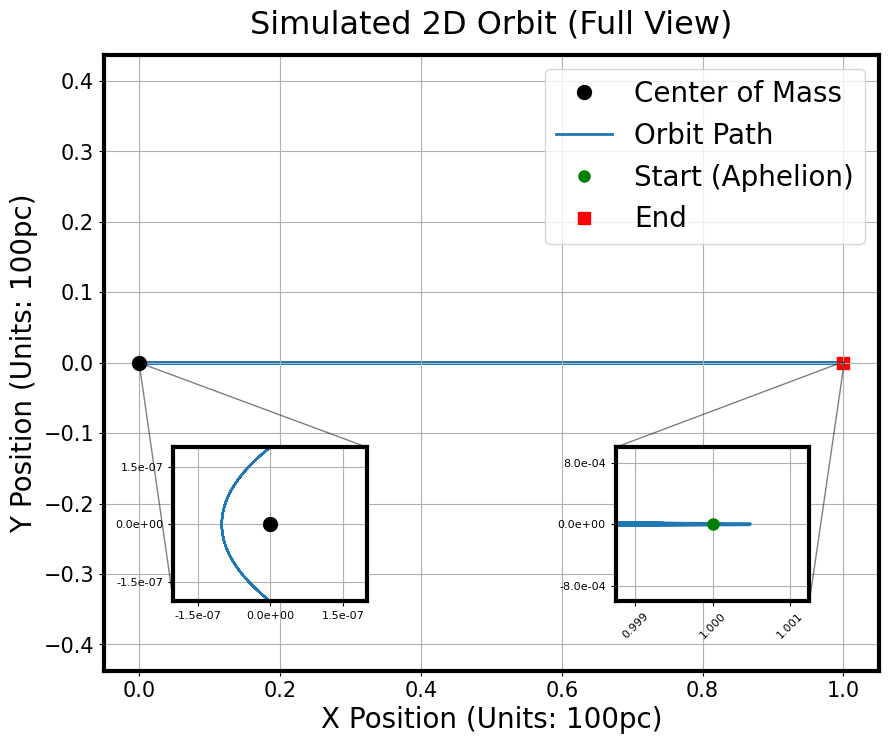

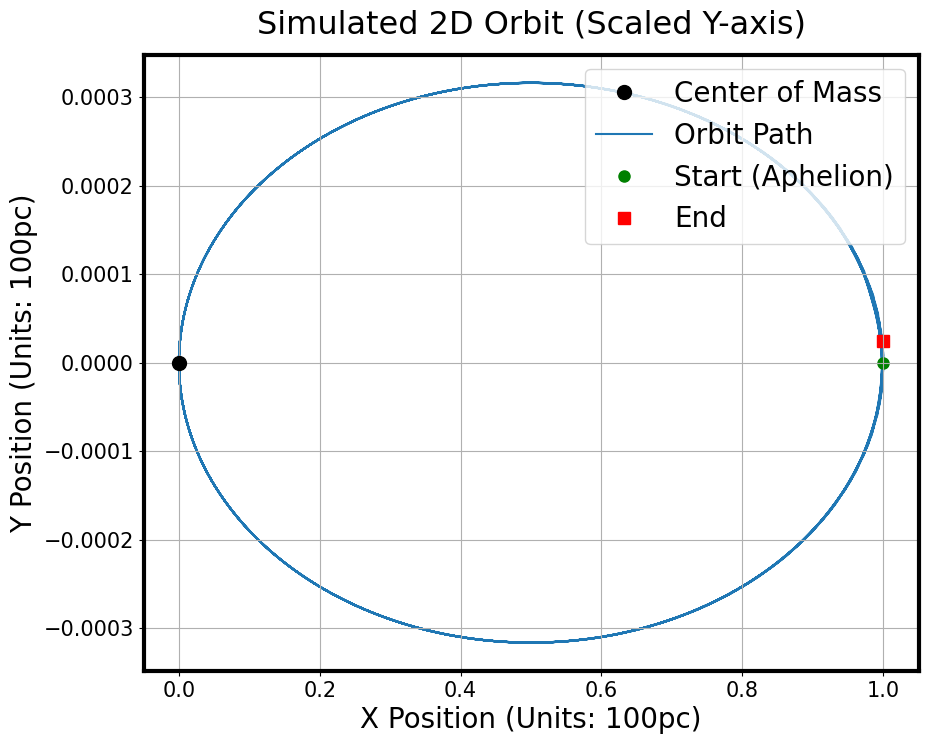

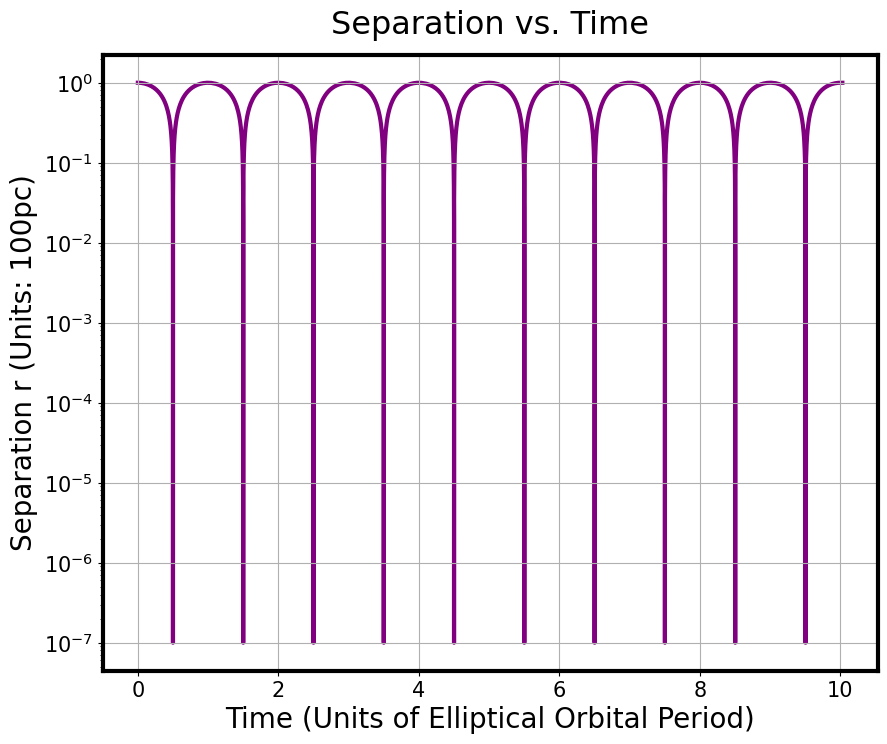

In [338]:
acc_no_df = lambda rvec,vvec: acceleration(rvec,vvec,A=0,B=0)

h_initial_1=1e-7
mu_eff = 0.25      # this is the standard gravitational parameter; in our units this is 1/4, anyways just matching from the force equation this is it
x_init = 1
y_init = 0
r_init = np.sqrt(x_init**2 + y_init**2)
r_sch = 1e-7            # this is the perihelion radius we want
a_ellipse = (r_init + r_sch) / 2.0
v_init_1 = np.sqrt(mu_eff * ((2.0 / r_init) - (1.0 / a_ellipse)))

period_ellipse=2*np.pi*np.sqrt(a_ellipse**3/mu_eff)
delta_1 = 1e-7       # this is the error tolerance per unit time; we need to find the best value of this

pos_list, vel_list, t_list = rk4_integrate(A=0, B=0, 
                                           h=h_initial_1, 
                                           r_init=np.array([x_init,y_init]), 
                                           v_init=np.array([0,v_init_1]),
                                           delta=delta_1, 
                                           t_final=period_ellipse*10)

t_array = np.array(t_list)
print(t_array.shape)
scaled_t_array = t_array * (1/period_ellipse)

plot_orbit_full(pos_list=pos_list,plt_name='test_plot',perihelion_zoom_size=1e-7,aphelion_zoom_size=1e-3)
plot_orbit_scaled(pos_list=pos_list,plt_name='test_plot')
plot_r_mag(pos_list=pos_list,t_array=scaled_t_array,plt_name='test_plot')

In [339]:
true_perihelion = r_sch
true_aphelion = r_init

pos_array = np.array(pos_list)
r_mag_array = np.linalg.norm(pos_array, axis=1)

numerical_perihelion = np.min(r_mag_array)
numerical_aphelion = np.max(r_mag_array)
perihelion_deviation = np.abs(numerical_perihelion - true_perihelion)
aphelion_deviation = np.abs(numerical_aphelion - true_aphelion)
perihelion_relative_error = (perihelion_deviation / true_perihelion) * 100
aphelion_relative_error = (aphelion_deviation / true_aphelion) * 100

print("\n--- Simulation Results ---")
print(f"Simulation ran for {len(t_list)} steps over {t_list[-1]:.2f} time units.")

print("\n--- Perihelion (Closest Approach) ---")
print(f"True Value:   {true_perihelion:.10e}")
print(f"Numerical Value:    {numerical_perihelion:.10e}")
print(f"Absolute Deviation: {perihelion_deviation:.10e}")
print(f"Relative Error:     {perihelion_relative_error:.6f} %")

print("\n--- Aphelion (Farthest Approach) ---")
print(f"True Value:   {true_aphelion:.10f}")
print(f"Numerical Value:    {numerical_aphelion:.10f}")
print(f"Absolute Deviation: {aphelion_deviation:.10f}")
print(f"Relative Error:     {aphelion_relative_error:.6f} %")


--- Simulation Results ---
Simulation ran for 12378 steps over 44.56 time units.

--- Perihelion (Closest Approach) ---
True Value:   1.0000000000e-07
Numerical Value:    1.0000002959e-07
Absolute Deviation: 2.9591074347e-14
Relative Error:     0.000030 %

--- Aphelion (Farthest Approach) ---
True Value:   1.0000000000
Numerical Value:    1.0003894938
Absolute Deviation: 0.0003894938
Relative Error:     0.038949 %


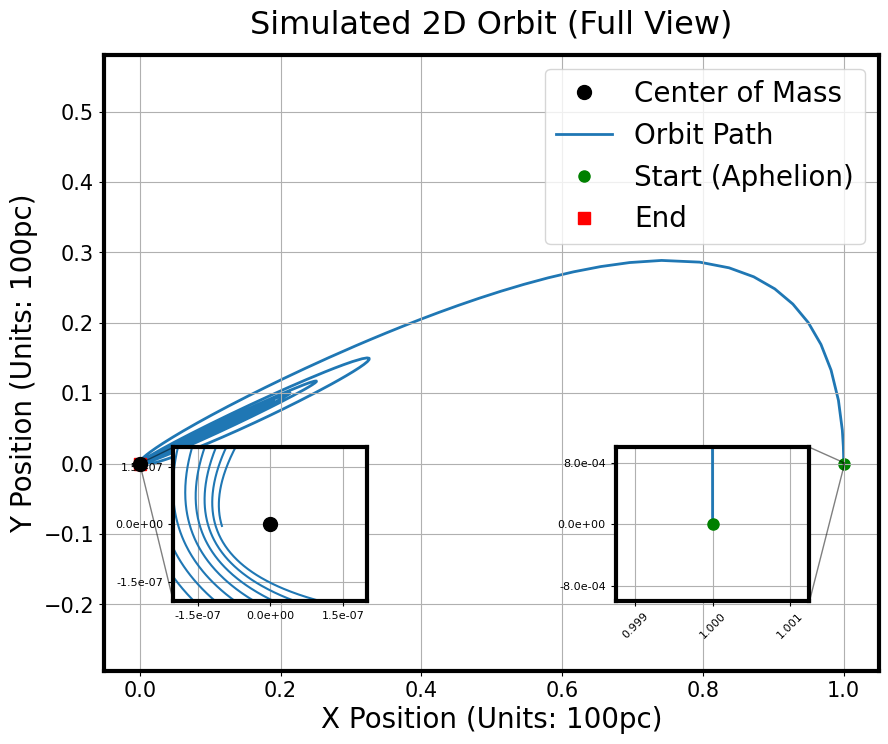

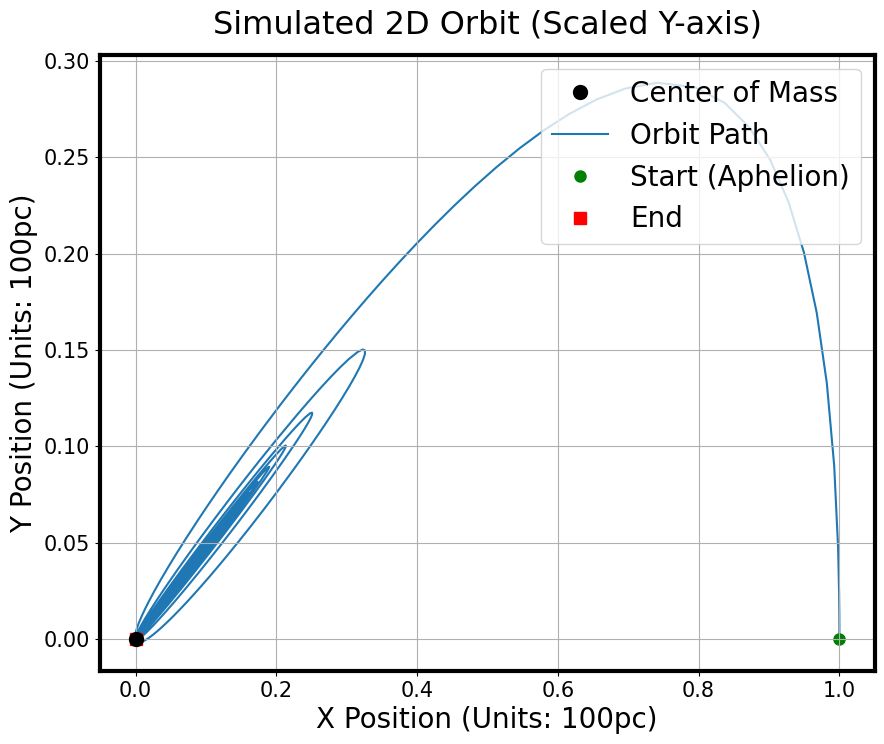

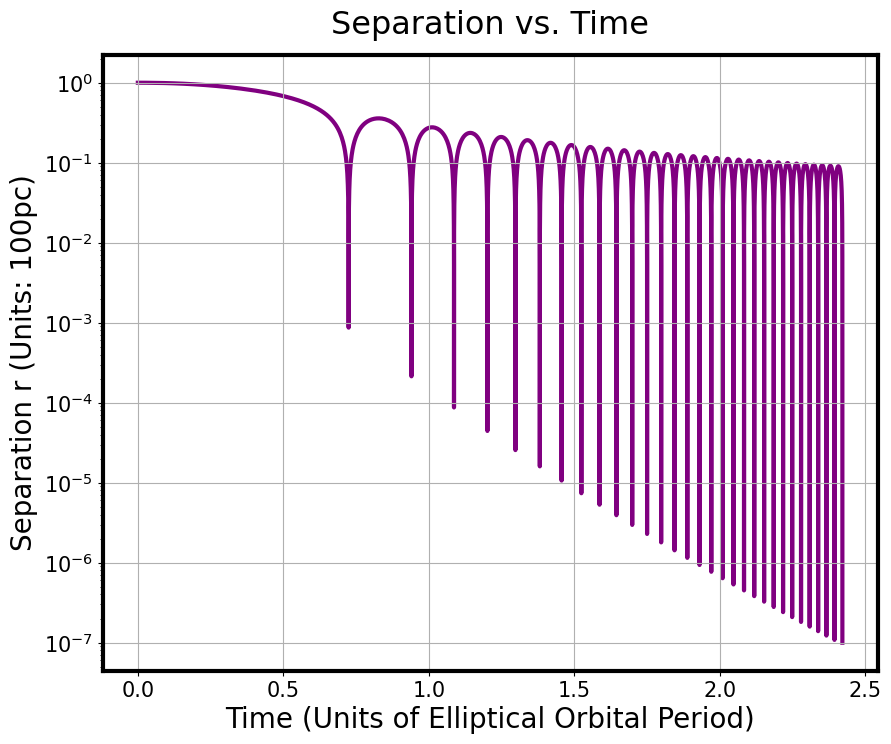

In [340]:
h_initial_2 = 1e-3
mu_eff = 0.25      # this is the standard gravitational parameter; in our units this is 1/4, anyways just matching from the force equation this is it
x_init = 1
y_init = 0
r_init_ = np.sqrt(x_init**2 + y_init**2)
r_final_2 = 1e-7            # this is the perihelion radius we want
a_ellipse = (r_init + r_sch) / 2.0
v_circ = np.sqrt(mu_eff/r_init) # in our units
v_init_2 = 0.8 * v_circ

period_ellipse=2*np.pi*np.sqrt(a_ellipse**3/mu_eff)     # This is a characteristic time scale from the orbit that would have resulted from an elliptical orbit
delta_2 = 1e-7       # this is the error tolerance per unit time; we need to find the best value of this

pos_list_2,vel_list_2,t_list_2 = rk4_integrate(A=1, B=1, 
                                               h=h_initial_2, 
                                               r_init=np.array([x_init,y_init]), 
                                               v_init=np.array([0,v_init_2]), 
                                               delta=delta_2, 
                                               r_final=r_final_2)

t_array_2 = np.array(t_list_2)
scaled_t_array_2 = t_array_2 * (1/period_ellipse)

plot_orbit_full(pos_list=pos_list_2,plt_name='ABeql1',perihelion_zoom_size=1e-7,aphelion_zoom_size=1e-3)
plot_orbit_scaled(pos_list=pos_list_2,plt_name='ABeql1')
plot_r_mag(pos_list=pos_list_2,t_array=scaled_t_array_2,plt_name='ABeql1')

In [346]:
t_final = np.max(t_array_2)
    
G_CONST = 6.6743e-11 
C_LIGHT = 2.99792458e8
METERS_PER_PARSEC = 3.0857e16
SECONDS_PER_MEGAYEAR = 3.1557e13

conversion_time_to_myr = np.sqrt(((100.0 * METERS_PER_PARSEC)**3) / (G_CONST * (((1e-7 * 100.0 * METERS_PER_PARSEC) * (C_LIGHT**2)) / (2 * G_CONST))))/SECONDS_PER_MEGAYEAR

t_in_Myr = t_final * conversion_time_to_myr

print(f'The Coalescence Time is: {t_in_Myr} Myrs')

The Coalescence Time is: 15.689003102500296 Myrs


In [334]:
from simulation_worker import run_single_simulation

def main():
    h_initial = 1e-3
    mu_eff = 0.25
    x_init = 1.0
    y_init = 0.0
    r_init_vec = np.array([x_init, y_init], dtype=np.float64)
    r_init_mag = np.linalg.norm(r_init_vec)
    r_final = 1e-7
    delta = 1e-7
    
    v_circ = np.sqrt(mu_eff / r_init_mag)
    v_init = 0.8 * v_circ
    v_init_vec = np.array([0.0, v_init], dtype=np.float64)

    A_values = np.linspace(0.5, 10, 10)
    B_values = np.linspace(0.5, 10, 10)
    A_grid, B_grid = np.meshgrid(A_values, B_values, indexing='ij')

    task_list = []
    for i in range(A_grid.shape[0]):
        for j in range(A_grid.shape[1]):
            A = A_grid[i, j]
            B = B_grid[i, j]
            task_list.append((A, B, h_initial, r_init_vec, v_init_vec, delta, r_final))

    print(f"Starting {len(task_list)} calculations on {multiprocessing.cpu_count()} cores...")

    with multiprocessing.Pool() as pool:
        results_flat = pool.map(run_single_simulation, task_list)

    t_grid = np.array(results_flat).reshape(A_grid.shape)
    return t_grid

t_grid_final = main()

Starting 100 calculations on 8 cores...


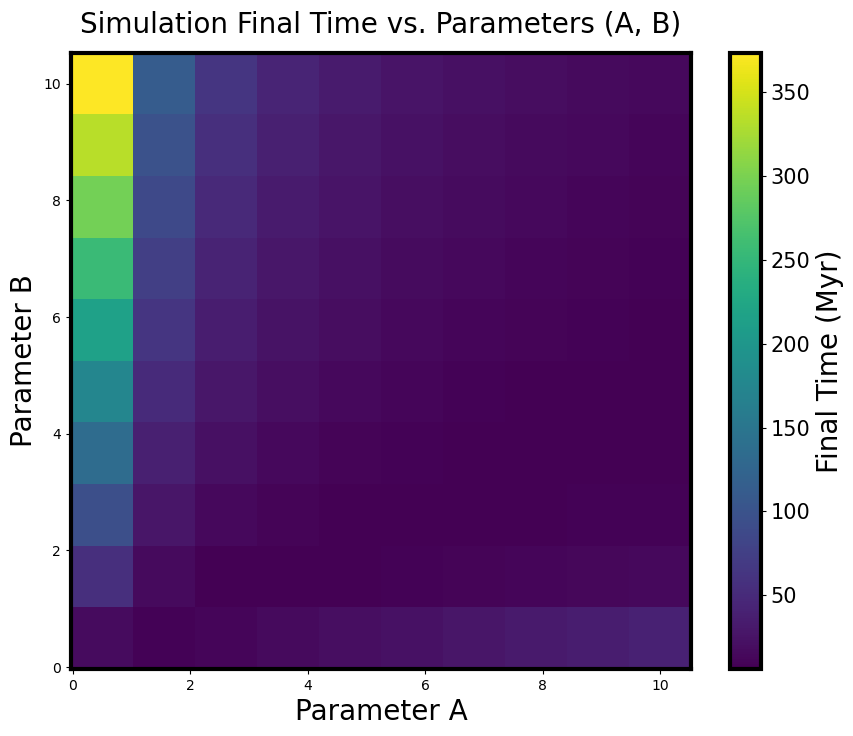

In [345]:
A_values = np.linspace(0.5, 10, 10)
B_values = np.linspace(0.5, 10, 10)
A_grid, B_grid = np.meshgrid(A_values, B_values, indexing='ij')

t_grid_final_myr = t_grid_final*conversion_time_to_myr

plt.figure(figsize=(10, 8))
plt.pcolormesh(A_grid, B_grid, t_grid_final_myr, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Final Time (Myr)', size=20)
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Parameter A',fontsize=20)
plt.ylabel('Parameter B',fontsize=20)
plt.title('Simulation Final Time vs. Parameters (A, B)',fontsize=20,pad=15)
plt.savefig(f'./hw4_p2_final_times_heatmap',bbox_inches="tight")
plt.show()

In [343]:
from simulation_worker import run_single_simulation

def main_2():
    h_initial = 1e-3
    x_init = 1.0
    y_init = 0.0
    r_init_vec = np.array([x_init, y_init], dtype=np.float64)
    r_final = 1e-7
    delta = 1e-7
    A=1
    B=1

    v_init_array = np.linspace(0.1, 1.5, 100)

    task_list = []
    for i in range(v_init_array.shape[0]):
        v_init = v_init_array[i]
        task_list.append((A, B, h_initial, r_init_vec, np.array([0.0, v_init], dtype=np.float64), delta, r_final))

    print(f"Starting {len(task_list)} calculations on {multiprocessing.cpu_count()} cores...")

    with multiprocessing.Pool() as pool:
        results_flat = pool.map(run_single_simulation, task_list)

    t_grid = np.array(results_flat).reshape(v_init_array.shape)
    return t_grid

t_grid_final_2 = main_2()

Starting 100 calculations on 8 cores...


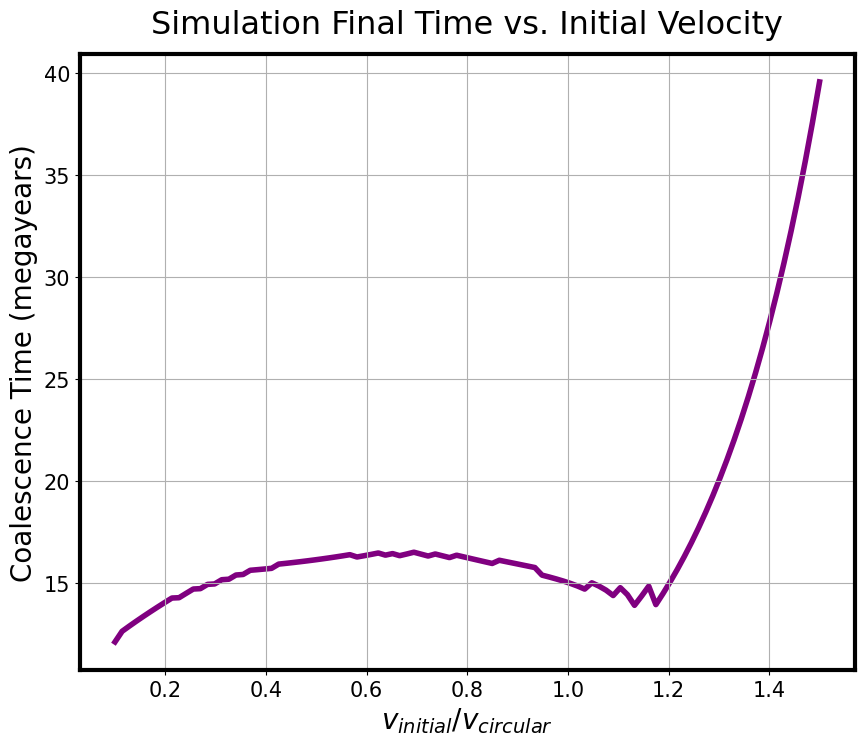

In [347]:
v_init_array = np.linspace(0.1, 1.5, 100)
t_grid_final_2_myr = t_grid_final_2*conversion_time_to_myr
v_init_array_scaled = v_init_array/v_circ

fig, ax_main = plt.subplots(figsize=(10, 8))
ax_main.plot(v_init_array, t_grid_final_2_myr, label='Orbit', zorder=0,lw=4,color='purple')
ax_main.set_title('Simulation Final Time vs. Initial Velocity',fontsize=23,pad=15)
ax_main.set_xlabel(r'$v_{initial}/v_{circular}$',fontsize=20)
ax_main.set_ylabel('Coalescence Time (megayears)',fontsize=20)
ax_main.tick_params(axis='both', which='major', labelsize=15)
ax_main.grid(True)
plt.savefig(f'./hw4_p2_time_vinit',bbox_inches="tight")
plt.show()